1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

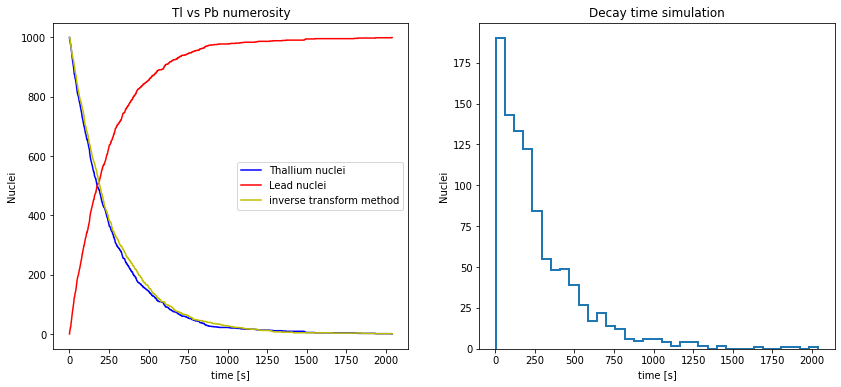

In [1]:
import numpy as np
import numpy.random as rd
import pandas as pd
from scipy import stats
import math

import matplotlib.pyplot as plt
import seaborn as sns

#1
#Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability  𝑝(𝑡)=1−2−𝑡/𝜏
#Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time


tau = 3.052*60/math.log(2) #mean lifetime in seconds

time = np.arange(0,10000) #time steps

Tl = 1000 #Thallium nuclei
Tl_number = [1000,] #inizializing array with Tl survived nuclei

for t in time:
    d = rd.choice([0, 1], Tl, p = [1/tau, 1-(1/tau)]) #generate 0(decay) or 1(survive) with differential exponential probability
    Tl = Tl - np.count_nonzero(d == 0) #count the number of decayed nuclei and write the number of survived nuclei
    Tl_number.append(Tl) 
    if Tl == 0: #stop when the last nucleus has decayed
        break

Pb_number = np.full(len(Tl_number), 1000) - Tl_number #array with Pb nuclei at each time

time = np.arange(0, len(Tl_number))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
#ax1.figure(figsize=(12, 4))
#ax1.subplot(121)
ax1.plot(time, Tl_number, 'b', label = "Thallium nuclei")
ax1.plot(time, Pb_number, 'r', label = "Lead nuclei")
ax1.set_xlabel("time [s]")
ax1.set_ylabel("Nuclei")
ax1.set_title("Tl vs Pb numerosity")

#2
#Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution  𝑝(𝑡)=2−𝑡/𝜏ln2𝜏
#to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

def inverse_transform(p, tau):
    return -tau*np.vectorize(np.log)(1-p)

plt.subplot(122)
cdf = rd.random(1000)
times = inverse_transform(cdf, tau) #simulated decay times through inverse transform method
plt.title("Decay time simulation")
ax2.hist(times, histtype='step', bins=35, density=False, linewidth=2)
ax2.set_xlabel("time [s]")
ax2.set_ylabel("Nuclei")

Tl_sim = [1000,]
for i in time:
    not_decayed = len([x for x in times if x >= i])
    Tl_sim.append(not_decayed)
ax1.plot(Tl_sim, 'y', label = 'inverse transform method')
ax1.legend(loc='best')

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

The integral with the hit/miss method is 1.346848 ± 0.008729679031900311 (each I computed in 0.06925788700813428 s)

The integral with the mean value method is 1.3956611703299802 ± 0.06553437532300378 (each I computed in 0.0346497660013847 s) 

The hit/miss method is 2 times slower, though 7 times more accurate than the mean value method (for this choice of N = 10000)


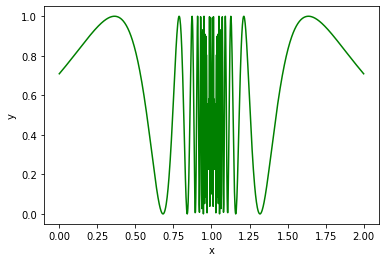

In [2]:
import numpy as np
import timeit

def f(x):
    return (np.sin(1. / (1-x)))**2

x = np.linspace(0.001, 1.999, 1000)
plt.plot(x, f(x), 'g-')
plt.xlabel("x")
plt.ylabel("y")

###
#hit/miss
###

def hitmiss(N, count = 0):
    for i in range(N):
        x = 2 * np.random.random() # integration in [0,2]
        y = np.random.random()     # y is random uniform between 0 and 1 (max and min are +- 1... all values have to lay in the box)
        if y < f(x): count += 1
    I = 2 * count / N              #(count*Area/N)
    return I


N = 10000 #random points
n = 100 #iterations
h_m = []
time = []

for i in range(n):
    a = timeit.default_timer()
    h_m.append(hitmiss(N))
    time.append(timeit.default_timer()-a)

integ = np.array(h_m)
mean = np.mean(integ)
std_dev = np.std(integ)
print("The integral with the hit/miss method is", mean, u"\u00B1", std_dev, "(each I computed in", np.mean(time), "s)" "\n")


###
#Mean value method
###

def meanvalue(N):
    x = 2 * np.random.random()
    val = f(x)
    av_f = np.mean(val)
    I = 2*av_f
    return I

h_m = []

for i in range(n):
    a = timeit.default_timer()
    h_m.append(meanvalue(N))
    time.append(timeit.default_timer()-a)
    
integ = np.array(h_m)
mean = np.mean(integ)
std_dev = np.std(integ)/np.sqrt(n) #for the mean value method each I is an average, therefore the average of I is the mean of the mean distribution
print("The integral with the mean value method is", mean, u"\u00B1", std_dev,"(each I computed in", np.mean(time), "s)", "\n")
print("The hit/miss method is 2 times slower, though 7 times more accurate than the mean value method (for this choice of N = 10000)")

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [3]:
#I'll use the hit/miss method, since it's more accurate

###
#area of the circle
###

def hitmiss_2(N, count = 0):
    for i in range(N):
        x = 2 * np.random.random() - 1 # x integration in [-1,1]
        y = 2 * np.random.random() - 1 # y integration in [-1,1]
        if f(x, y) <= 1: count += 1
    I = 4 * count / N                  #(count*Area/N)
    return I

def f(x, y):
    return x**2+y**2

N = 10000 #random points
n = 100 #iterations

h_m = []

for i in range(n):
    h_m.append(hitmiss_2(N))

integ = np.array(h_m)
mean = np.mean(integ)
std_dev = np.std(integ)
print("The integral with the hit/miss method is", mean, u"\u00B1", std_dev)
print("The known result is \u03C0 =", math.pi,"\n")


###
#10D sphere
###

def hitmiss_10(N, count = 0):
    for i in range(N):
        x = 2 * np.random.rand(10) -1       #generate 10 random numbers in [-1,1]
        if f(x) <= 1: count += 1
    I = (2**10) * count / N                  #(count*Area/N)
    return I

def f(x):
    return np.sum(x*x)

h_m = []

for i in range(n):
    h_m.append(hitmiss_10(N))

integ = np.array(h_m)
mean = np.mean(integ)
std_dev = np.std(integ)
print("The integral with the hit/miss method is", mean, u"\u00B1", std_dev)
print("The known result is \u03C0^5/(5!) =", math.pi**5/(math.factorial(5)),"\n")

The integral with the hit/miss method is 3.1415319999999998 ± 0.01635213062570134
The known result is π = 3.141592653589793 

The integral with the hit/miss method is 2.546688 ± 0.42975195107875885
The known result is π^5/(5!) = 2.550164039877345 



4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [8]:
import numpy as np
import math
from scipy.integrate import quad

def w(x):
    return x**(-1/2)

def importance(N):
    x = np.random.rand(N)
    val = (np.vectorize(f)(x))/(np.vectorize(w)(x))
    av_fweight = np.mean(val)
    return av_fweight*int_w

def f(x):
    return (x**(-1/2)/(math.exp(x)+1))

int_w = 2

N = 10000
n = 100

mv = []

for i in range(n):
    mv.append(meanvalue(N))
    
integ = np.array(mv)
mean = np.mean(integ)
std_dev = np.std(integ)/np.sqrt(n) #here the std_dev of the I is the std dev of the mean distribution
print("The integral with the mean value method is", mean, u"\u00B1", std_dev)

res, err = quad(np.vectorize(f), 0,1)
print("Result with quad integration =", res)

The integral with the mean value method is 1.0783892272719837 ± 0.14424867141417114
Result with quad integration = 0.8389329600133838
